In [1]:
import torch
import time
import os
import sys
import pandas as pd
sys.path.append("../birdsong")
from datasets.tools.sampling import upsample_df
from datasets.tools.enhancement import exponent
from datasets.sequential import SpectralDataset
import matplotlib.pyplot as plt

INPUT_DIR = '../storage/signal_slices'
TRAIN = pd.read_csv('../mel_slices_train.csv')
train_df = upsample_df(TRAIN, 400)

In [2]:
import pickle
import random
class SoundscapeNoise(object):
    def __init__(self, noise_dir, scaling=0.2):
        self.scaling = scaling
        self.noise_bank = self._load_noise(noise_dir)
        
    def __call__(self, img):
        noise = random.choice(self.noise_bank)
        noise -= noise.min()
        noise /= noise.max()
        noise *= img.max()
        return img + self.scaling * noise
    
    def _load_noise(self, noise_dir):
        print('Loading noise bank into RAM.')
        noise = []
        for file in os.listdir(noise_dir):
            path = os.path.join(noise_dir, file)
            noise_slice = self._unpickle(path)
            if noise_slice.max() != 0:
                noise.append(noise_slice)
        return noise
    
    def _unpickle(self, path):
        with open(path, 'rb') as f:
            slice_ = pickle.load(f)
        return slice_

    def __repr__(self):
        return self.__class__.__name__ + f' Scaling: {self.scaling}'

In [36]:
noiser = SoundscapeNoise('../storage/noise_slices',scaling = 0.3)

Loading noise bank into RAM.


In [37]:
ds_aug = SpectralDataset(train_df, INPUT_DIR, enhancement_func=exponent, augmentation_func=noiser)
ds_no_aug = SpectralDataset(train_df, INPUT_DIR, enhancement_func=exponent)

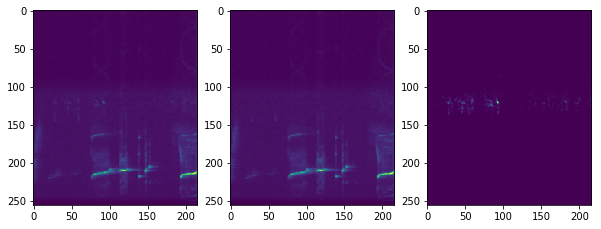

In [47]:
augmented = ds_aug[0][0]
not_augmented = ds_no_aug[0][0]

plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(augmented.squeeze())
plt.subplot(132)
plt.imshow(not_augmented.squeeze())
plt.subplot(133)
plt.imshow(augmented.squeeze()-not_augmented.squeeze())
plt.show()

In [46]:
(augmented.squeeze()-not_augmented.squeeze()).max()

0.29999964618507624

In [8]:
import numpy as np
empty = np.ones((256,216))
noise = noiser(empty)

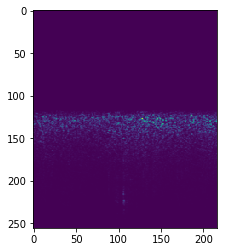

In [9]:
plt.imshow(noise)

In [10]:
noise.max()

2.0

In [11]:
noise_max = []
for i in range(50):
    noise = noiser(empty)
    noise_max.append(noise.max())

In [12]:
np.mean(noise_max)

2.0

In [13]:
noise_max

[2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0]

In [14]:
def unpickle(path):
        with open(path, 'rb') as f:
            slice_ = pickle.load(f)
        return slice_

spec_max = []
for path in train_df.path[:50]:
    full_path = os.path.join(INPUT_DIR, path)
    slice_ = unpickle(full_path)
    spec_max.append(slice_.max())

In [15]:
spec_max

[918.1498192866005,
 448.13511138014724,
 19341.03548386729,
 44.126120683278735,
 22.39793000698396,
 28.033665409230238,
 12.392960552276266,
 238.72678951227215,
 5076.09904247751,
 661.4646931148604,
 15.749108957890781,
 299.15205292364266,
 53.10590174081761,
 17.71483306991703,
 2990.814101009752,
 0.6610579407523687,
 187.19525723571084,
 216.588747319783,
 853.6549825393807,
 352.24496948174334,
 8.662740283692226,
 1732.6120779460598,
 71.42232650799112,
 47.7287376141796,
 203.93548395233117,
 0.31356306564253283,
 134.96340377329042,
 2.322062077105888,
 138.66974466230053,
 1021.5403019855654,
 5.078498480863255,
 549.7434786871536,
 9975.401694220447,
 3623.4264954865002,
 1.48360410285157,
 6.585447923939079,
 4.285068009186661,
 9.63611450121697,
 320.8420916358086,
 7.856558861353739,
 165.16189343846648,
 14.749953959469885,
 556.9319671522582,
 3.5460942634121877,
 4.159104479190658,
 6.03902825954415,
 90.65641904839046,
 86.05430557421552,
 476.6115155322901,
 17.4